In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/gene_expression.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(y_test, y_pred)

0.8922222222222222

In [12]:
# error
1 - accuracy_score(y_test, y_pred)

0.10777777777777775

In [13]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    
    test_error_rates.append(test_error)    

In [14]:
test_error_rates

[0.10777777777777775,
 0.09999999999999998,
 0.07444444444444442,
 0.07666666666666666,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.06222222222222218,
 0.06222222222222218,
 0.06000000000000005,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Neighbors')

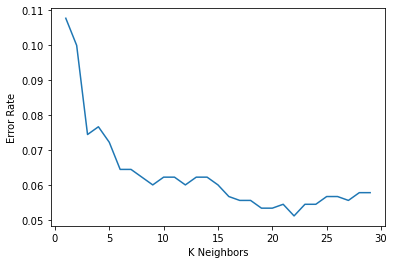

In [15]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

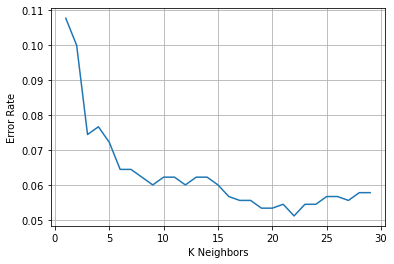

In [16]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

plt.grid()

In [17]:
scaler = StandardScaler()

In [18]:
knn = KNeighborsClassifier()

In [19]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [20]:
operations = [('scaler', scaler), ('knn', knn), ]

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
pipe = Pipeline(operations)

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
k_values = list(range(1, 20))

In [25]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [26]:
param_grid = {
    'knn__n_neighbors': k_values
}

In [27]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [28]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [30]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=18))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [32]:
full_predictions = full_cv_classifier.predict(X_test)

In [33]:
print(classification_report(y_test, full_predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [34]:
new_patient = [[3.8, 6.4]]

In [35]:
full_cv_classifier.predict(new_patient)

array([0])

In [36]:
full_cv_classifier.predict_proba(new_patient)

array([[0.72222222, 0.27777778]])